In [1]:
from dataclasses import dataclass
import csv

import click
import requests
import psycopg2
import psycopg2.extras
import pandas.io.sql as sqlio
import ipympl 

import random 
# importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ast
from collections import deque

In [2]:
import os 
print(os.getcwd())

d:\source\PesquisaMestradoFinal


Foram geradas as ações abaixo  
acao 0 = ["0.1,0.1,0.1,1,1","1,1,1,0.1,0.1","0.5,0.5,0.5,0.1,0.1","0.1,0.1,0.1,0.5,0.5","1,1,1,1,1"] 
Com as ações acima, foram criado cenários com 68 interação no ambiente
Ambiente é uma topologia de rede neural para resoluções de questões do tipo  multitarefas da base Clevr sem imagem  
Cada epsódio foi executado 3x e sua média computada 
Para cada média dos epsodios foram gerados :
     Grafico   
     DataBase para execução DQN 



In [3]:
#Carrega a media dos epsodios 
def LoadEp( acao ): 
    
    arquivo = pd.read_csv(acao)
    return arquivo
    

In [4]:
#Gera Database Para treinamento DQN 

def generateDataBaseEpsodi ( dataEpsopdios,  multi, power, episodes,DoneInteractions,TypeReward,intFactor,memory):
  state = [0,0,0,0,0]
  acumulativeReward = 0
  done = False
  print(episodes*intFactor)
  
  for epsodio in dataEpsopdios:
    for interaction in range(episodes*intFactor): 
   
      action = epsodio["acao"][interaction]  
      print('****************************************************** aqui ***********************')
      print(ast.literal_eval(epsodio["concat"][interaction])*power)
      stateNew = ast.literal_eval(epsodio["concat"][interaction])*power     
      if TypeReward == "MAX" :
        reward = multi*np.max(stateNew )
        if interaction <= DoneInteractions-1:
          acumulativeReward += reward
      elif TypeReward == "MIN" :
        reward = multi*np.min(stateNew )
        if interaction <= DoneInteractions-1:
          acumulativeReward += reward
      elif TypeReward == "AVARAGE" :
        reward = multi*np.avarage(stateNew )
        if interaction <= DoneInteractions-1:
          acumulativeReward += reward
      elif TypeReward == "MAX_LAST" :
        reward = multi*np.max(stateNew )
        if interaction == DoneInteractions-1:
          acumulativeReward = reward
      elif TypeReward == "MIN_LAST" :
        reward = multi*np.min(stateNew)
        if interaction == DoneInteractions-1:
          acumulativeReward = reward
      elif TypeReward == 'AVERAGE_LAST':
        reward = multi*np.average(stateNew) 
        if interaction == DoneInteractions-1:
          acumulativeReward = reward
      
      else: 
        print('ERRO ERRO ERRO ERRO ERRO')
      if interaction >= DoneInteractions*intFactor -1  :
        done = True
      memory.append([state,action,reward,stateNew,done])
      state = stateNew
      print(" ************  Random: Episode {}, Reward {}".format(
                interaction, acumulativeReward))

  return memory

In [5]:
def generateDataToRels ( epsodios, questoes ):
    
    graf =  np.zeros ((len(epsodios),questoes,len(epsodios[0]["concat"])))

    for ep in range ( len(epsodios)):
        #print(ep)
        for questao  in range(questoes):
            for interaction in range(len(epsodios[ep]["concat"])):
                graf[ep,questao,interaction] = ast.literal_eval(epsodios[ep]["concat"][interaction])[questao]
    return graf        



In [34]:
def gerarRelatorio( baseDados,cabecalho):
   
  #acoes=  ['Acao1-0.1,0.1,0.1,1,1','Acao2-0.5,0.5,0.5,1,1','Acao3-1,1,1,1,1','Acao4-1,1,1,0.5,0.5','Acao5-1,1,1,0.1,0.1','aleatorio1','aleatorio2','aleatorio3','aleatorio4','aleatorio5','aleatorio6','aleatorio7','aleatorio8','aleatorio9','aleatorio10','aleatorio11','aleatorio12','aleatorio13','aleatorio14','aleatorio15','aleatorio16','aleatorio17','aleatorio18','aleatorio19','aleatorio20']
  #acoes=  ['Acao1-execucao1','Acao1-excucao2','acao1-execucao3','Acao2-execucao1','Acao2-excucao2','acao2-execucao3','Acao3-execucao1','Acao3-excucao2','acao3-execucao3','Acao4-execucao1','Acao4-excucao2','acao4-execucao3','Acao5-execucao1','Acao5-excucao2','acao5- execucao2']
  
  #acoes=  ['Acao1-0.1,0.1,0.1,1,1','Acao2-0.5,0.5,0.5,1,1','Acao3-1,1,1,1,1','Acao4-1,1,1,0.5,0.5','Acao5-1,1,1,0.1,0.1','aleatorio1','aleatorio2','aleatorio3','aleatorio4','aleatorio5','aleatorio6','aleatorio7','aleatorio8','aleatorio9','aleatorio10','aleatorio11','aleatorio12','aleatorio13','aleatorio14','aleatorio15','aleatorio16','aleatorio17','aleatorio18','aleatorio19','aleatorio20']
  
  acoes=  ['Acao1-0.1,0.1,0.1,1,1','Acao2-0.5,0.5,0.5,1,1','Acao3-1,1,1,1,1','Acao4-1,1,1,0.5,0.5','Acao5-1,1,1,0.1,0.1','AgenteMiminimoLASTComimagemAleatorio','AgenteMiminimoLASTComimagemTudo','AgenteMiminimoComimagemTudo']         
           
  #for acao in range ( len( baseDados[i] )  ): 
  for i in range(len(baseDados)):
    fig, ax = plt.subplots()
    for acao in range ( len( baseDados[i] )  ): 
      ax.plot(baseDados[i,acao][:37],label="Questao {}".format(acao))
     
    ax.set_title (cabecalho )
    plt.legend(loc="lower right")
   
    fig.autofmt_xdate()  
      
  

#ax.set_title('Yellow Taxi Trips in New York City')
#ax.set_xlabel('Pickup Date')
#ax.set_ylabel('Trips')
#ax.set_ylim(0, 120000)


In [26]:
def gerarRelatorio1( baseDados,cabecalho):
   
  #acoes=  ['Acao1-0.1,0.1,0.1,1,1','Acao2-0.5,0.5,0.5,1,1','Acao3-1,1,1,1,1','Acao4-1,1,1,0.5,0.5','Acao5-1,1,1,0.1,0.1','aleatorio1','aleatorio2','aleatorio3','aleatorio4','aleatorio5','aleatorio6','aleatorio7','aleatorio8','aleatorio9','aleatorio10','aleatorio11','aleatorio12','aleatorio13','aleatorio14','aleatorio15','aleatorio16','aleatorio17','aleatorio18','aleatorio19','aleatorio20']
  #acoes=  ['Acao1-execucao1','Acao1-excucao2','acao1-execucao3','Acao2-execucao1','Acao2-excucao2','acao2-execucao3','Acao3-execucao1','Acao3-excucao2','acao3-execucao3','Acao4-execucao1','Acao4-excucao2','acao4-execucao3','Acao5-execucao1','Acao5-excucao2','acao5- execucao2']
  
  #acoes=  ['Acao1-0.1,0.1,0.1,1,1','Acao2-0.5,0.5,0.5,1,1','Acao3-1,1,1,1,1','Acao4-1,1,1,0.5,0.5','Acao5-1,1,1,0.1,0.1','aleatorio1','aleatorio2','aleatorio3','aleatorio4','aleatorio5','aleatorio6','aleatorio7','aleatorio8','aleatorio9','aleatorio10','aleatorio11','aleatorio12','aleatorio13','aleatorio14','aleatorio15','aleatorio16','aleatorio17','aleatorio18','aleatorio19','aleatorio20']
  
  acoes=  ['Acao1-0.1,0.1,0.1,1,1','Acao2-0.5,0.5,0.5,1,1','Acao3-1,1,1,1,1','Acao4-1,1,1,0.5,0.5','Acao5-1,1,1,0.1,0.1','AgenteMiminimoLASTComimagemAleatorio','AgenteMiminimoLASTComimagemTudo','AgenteMiminimoComimagemTudo']         
           
  #for acao in range ( len( baseDados[i] )  ): 
  for i in range(len(baseDados)):
    fig, ax = plt.subplots()
    for acao in range ( len( baseDados[i] )  ): 
      ax.plot(baseDados[i,acao][:35],label="Questao {}".format(acao))
     
    ax.set_title (cabecalho )
    plt.legend(loc="lower right")
    plt.grid()
    fig.autofmt_xdate()  
      
  

#ax.set_title('Yellow Taxi Trips in New York City')
#ax.set_xlabel('Pickup Date')
#ax.set_ylabel('Trips')
#ax.set_ylim(0, 120000)

In [19]:



# Problem
DoneInteractions = 28


# Database
episodes = 28
intFactor = 1
buffer_size = episodes*DoneInteractions*intFactor

TypeReward = "MIN"
multi = 1
power = 1

memory = deque(maxlen=buffer_size)
epsodios =[]

ac1 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\acao0.csv')
ac2 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\acao1.csv')
ac3 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\acao2.csv')
ac4 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\acao3.csv')
ac5 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\acao4.csv')

ac1img = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\acao0_imagem.csv')
ac2img = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\acao1_imagem.csv')
ac3img = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\acao2_imagem.csv')
ac4img = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\acao3_imagem.csv')
ac5img = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\acao4_imagem.csv')




ale1 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio1.csv')
ale2 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio2.csv')
ale3 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio3.csv')
ale4 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio4.csv')
ale5 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio5.csv')
ale6 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio6.csv')
ale7 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio7.csv')
ale8 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio8.csv')
ale9 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio9.csv')
ale10 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio10.csv')

ale11 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio11.csv')
ale12 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio12.csv')
ale13 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio13.csv')
ale14 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio14.csv')
ale15 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio15.csv')
ale16 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio16.csv')
ale17 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio17.csv')
ale18 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio18.csv')
ale19 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio19.csv')
ale20 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioEpsodio20.csv')


ale1Imagem = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioImagemEpsodio1.csv')
ale2Imagem = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioImagemEpsodio2.csv')
ale3Imagem = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioImagemEpsodio3.csv')
ale4Imagem = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioImagemEpsodio4.csv')
ale5Imagem = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioImagemEpsodio5.csv')
ale6Imagem = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioImagemEpsodio6.csv')
ale7Imagem = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioImagemEpsodio7.csv')
ale8Imagem = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioImagemEpsodio8.csv')
ale9Imagem = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioImagemEpsodio9.csv')
ale10Imagem = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioImagemEpsodio10.csv')

ale11Imagem = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioImagemEpsodio11.csv')
ale12Imagem = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioImagemEpsodio12.csv')
ale13Imagem = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioImagemEpsodio13.csv')
ale14Imagem = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioImagemEpsodio14.csv')
ale15Imagem = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioImagemEpsodio15.csv')
ale16Imagem = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioImagemEpsodio16.csv')
ale17Imagem = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioImagemEpsodio17.csv')
ale18Imagem = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioImagemEpsodio18.csv')
ale19Imagem = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioImagemEpsodio19.csv')
ale20Imagem = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AleatorioImagemEpsodio20.csv')




deterExcu0 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\execucaomanualacao0.csv')
deterExcu1 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\execucaomanualacao1.csv')
deterExcu2 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\execucaomanualacao2.csv')
deterExcu3 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\execucaomanualacao3.csv')
deterExcu4 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\execucaomanualacao4.csv')

Acao1_exc0 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\Acao1_exc0.csv')
Acao1_exc1 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\Acao1_exc1.csv')
Acao1_exc2 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\Acao1_exc2.csv')


Acao2_exc0 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\Acao2_exc0.csv')
Acao2_exc1 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\Acao2_exc1.csv')
Acao2_exc2 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\Acao2_exc2.csv')

Acao3_exc0 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\Acao3_exc0.csv')
Acao3_exc1 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\Acao3_exc1.csv')
Acao3_exc2 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\Acao3_exc2.csv')

Acao4_exc0 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\Acao4_exc0.csv')
Acao4_exc1 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\Acao4_exc1.csv')
Acao4_exc2 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\Acao4_exc2.csv')

Acao5_exc0 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\Acao5_exc0.csv')
Acao5_exc1 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\Acao5_exc1.csv')
Acao5_exc2 = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\Acao5_exc2.csv')

AgenteMiminimoLASTComimagemAleatorio =  LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AgenteMiminimoLASTComimagemAleatorio.csv')
AgenteMiminimoLASTComimagemTudo =  LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AgenteMiminimoLASTComimagemTudo.csv')
AgenteMiminimoComimagemTudo = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AgenteMiminimoComimagemTudo.csv')

AgenteavgASTComimagemTudo = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AgenteavgASTComimagemTudo.csv')

#AgenteMiminimoLastSemimagemTudo =  LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AgenteMiminimoLastSemimagemTudo.csv')
#AgenteMiminimoLastSemimagemAleatorio =  LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AgenteMiminimoLastSemimagemAleatorio.csv')


#epsodios.append(deterExcu0)
#epsodios.append(deterExcu1)
#epsodios.append(deterExcu2)
#epsodios.append(deterExcu3)
#epsodios.append(deterExcu4)

#epsodios.append(Acao1_exc0)
#epsodios.append(Acao1_exc1)
#epsodios.append(Acao1_exc2)
#epsodios.append(Acao2_exc0)
#epsodios.append(Acao2_exc1)
#epsodios.append(Acao2_exc2)

#epsodios.append(Acao3_exc0)
#epsodios.append(Acao3_exc1)
#epsodios.append(Acao3_exc2)

#epsodios.append(Acao4_exc0)
#epsodios.append(Acao4_exc1)
#epsodios.append(Acao4_exc2)

#epsodios.append(Acao5_exc0)
#epsodios.append(Acao5_exc1)
#epsodios.append(Acao5_exc2)

#epsodios.append(ac1)
#epsodios.append(ac2)
#epsodios.append(ac3)
#epsodios.append(ac4)
#epsodios.append(ac5)


#epsodios.append(ale1)
#epsodios.append(ale2)
#epsodios.append(ale3)
#epsodios.append(ale5)
#epsodios.append(ale6)
#epsodios.append(ale7)
#epsodios.append(ale8)
#epsodios.append(ale9)
#epsodios.append(ale10)
#epsodios.append(ale11)
#epsodios.append(ale12)
#epsodios.append(ale13)
#epsodios.append(ale14)
#epsodios.append(ale15)
#epsodios.append(ale16)
#epsodios.append(ale17)
#epsodios.append(ale18)
#epsodios.append(ale19)
#epsodios.append(ale20)
#epsodios.append(ale20)




#epsodios.append(ac1img)
#epsodios.append(ac2img)
#epsodios.append(ac3img)
#epsodios.append(ac4img)
#epsodios.append(ac5img)
#epsodios.append(ale1Imagem)
#epsodios.append(ale2Imagem)
#epsodios.append(ale3Imagem)
#epsodios.append(ale5Imagem)
#epsodios.append(ale6Imagem)
#epsodios.append(ale7Imagem)
#epsodios.append(ale8Imagem)
#epsodios.append(ale9Imagem)
#epsodios.append(ale10Imagem)
#epsodios.append(ale11Imagem)
#epsodios.append(ale12Imagem)
#epsodios.append(ale13Imagem)
#epsodios.append(ale14Imagem)
#epsodios.append(ale15Imagem)
#epsodios.append(ale16Imagem)
#epsodios.append(ale17Imagem)
#epsodios.append(ale18Imagem)
#epsodios.append(ale19Imagem)
#epsodios.append(ale20Imagem)
#epsodios.append(ale20Imagem)

  

#epsodios.append(AgenteMiminimoLASTComimagemAleatorio)

#epsodios.append(AgenteMiminimoLASTComimagemTudo)

#epsodios.append(AgenteMiminimoComimagemTudo)

#epsodios.append(AgenteavgASTComimagemTudo)
#epsodios.append(ale3Imagem)


memory1 = generateDataBaseEpsodi ( epsodios,  multi, power, episodes,DoneInteractions,TypeReward,intFactor,memory)
print('****************' + str(len(epsodios)))



28
****************0


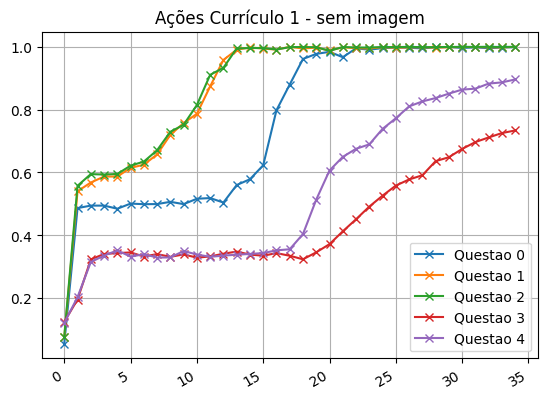

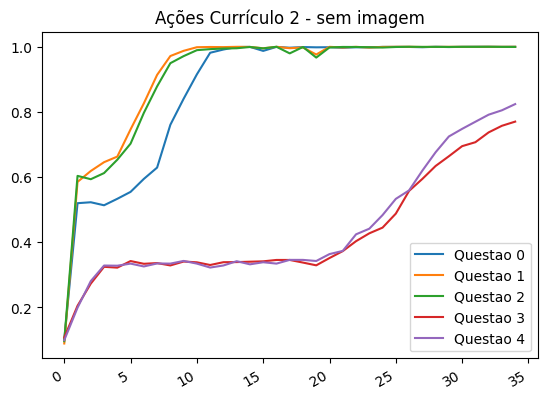

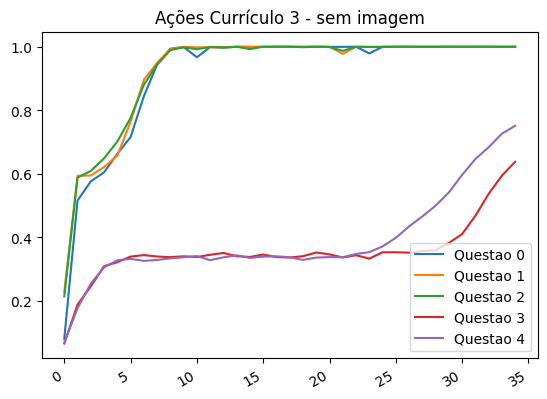

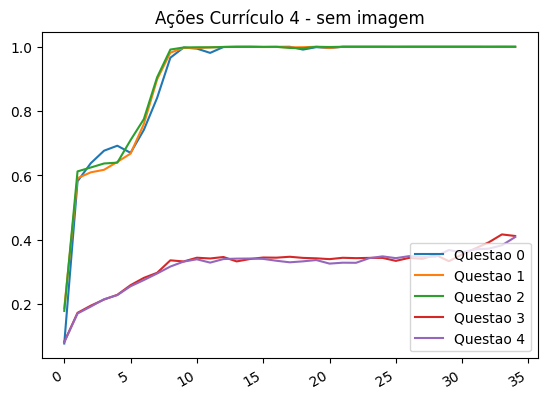

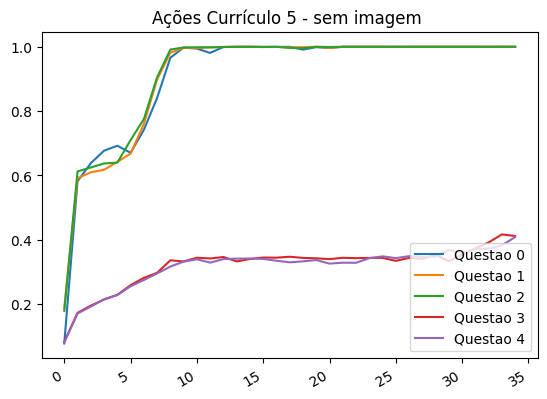

In [24]:
epsodios=[]
epsodios.append(ac1)
titulo = 'Ações Currículo 1 - sem imagem'
dataRel = generateDataToRels(epsodios,5)
gerarRelatorio1(dataRel,titulo)


epsodios=[]
epsodios.append(ac2)
titulo = 'Ações Currículo 2 - sem imagem'
dataRel = generateDataToRels(epsodios,5)
gerarRelatorio(dataRel,titulo)


epsodios=[]
epsodios.append(ac3)
titulo = 'Ações Currículo 3 - sem imagem'
dataRel = generateDataToRels(epsodios,5)
gerarRelatorio(dataRel,titulo)

epsodios=[]
epsodios.append(ac4)
titulo = 'Ações Currículo 4 - sem imagem'
dataRel = generateDataToRels(epsodios,5)
gerarRelatorio(dataRel,titulo)

epsodios=[]
epsodios.append(ac4)
titulo = 'Ações Currículo 5 - sem imagem '
dataRel = generateDataToRels(epsodios,5)
gerarRelatorio(dataRel,titulo)


In [9]:
def plotDataAnalise (Qpoliticas, criterion,qtdAnalise) :

  fig, ax1 = plt.subplots()

  V = []
  contador=-1
  print(len(Qpoliticas)) 
  for Q_ in Qpoliticas: 
    Q_ = Q_[:qtdAnalise] 
    contador+=1
    if criterion == 'MIN':
      ax1.plot(np.min(Q_,axis=1),label='Ação :{}'.format(contador))
      V.append( np.sum(np.min(Q_,axis=1) ) )
    elif criterion == 'MAX':
      ax1.plot(np.max(Q_,axis=1),label='Ação :{}'.format(contador))
      V.append( np.sum(np.max(Q_,axis=1) ) )
    elif criterion == 'AVERAGE':
      ax1.plot(np.average(Q_,axis=1),label='Ação :{}'.format(contador))
      V.append( np.sum(np.average(Q_,axis=1) ) )
    elif criterion == 'MIN_LAST':
      ax1.plot(np.min(Q_,axis=1),label='Ação :{}'.format(contador))
      V.append( np.min(Q_[-1]) )
   
    elif criterion == 'MAX_LAST':
      ax1.plot(np.max(Q_,axis=1),label='Ação :{}'.format(contador))
      V.append( np.max(Q_[-1]) )
    elif criterion == 'AVERAGE_LAST':
      ax1.plot(np.average(Q_,axis=1),label='Ação :{}'.format(contador))
      V.append( np.average(Q_[-1]) )

    else:
      print('BUG BUG BUG')

    ax1.set_title('Recompensa - {}'.format(criterion))
    plt.legend(loc="lower right")
    fig.autofmt_xdate()  
    plt.legend(loc="lower right")
  plt.show()
  return V




5


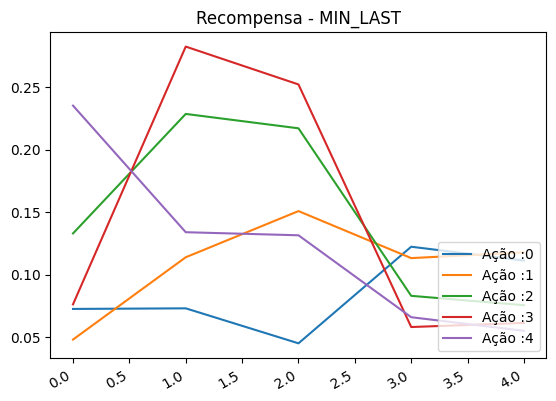

[0.11122, 0.11777, 0.0755, 0.06133, 0.05502]

In [10]:
epsodios=[]
epsodios.append(ac1img)
epsodios.append(ac2img)
epsodios.append(ac3img)
epsodios.append(ac4img)
epsodios.append(ac5img)
dataRel = generateDataToRels(epsodios,5)
plotDataAnalise(dataRel,'MIN_LAST',35)

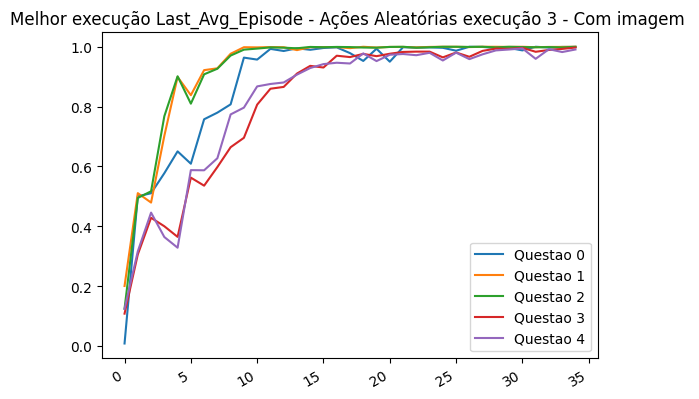

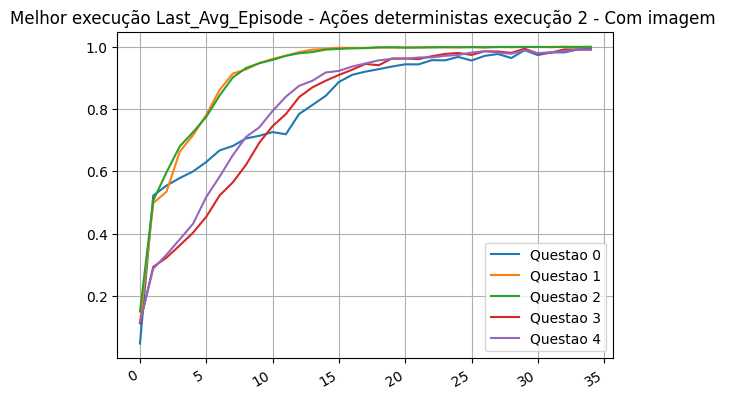

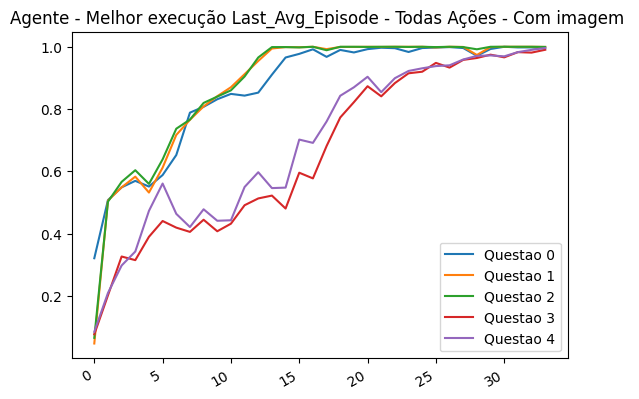

In [27]:

epsodios=[]
epsodios.append(ale3Imagem)
titulo = 'Melhor execução Last_Avg_Episode - Ações Aleatórias execução 3 - Com imagem '
dataRel = generateDataToRels(epsodios,5)
gerarRelatorio(dataRel,titulo)


epsodios=[]
epsodios.append(ac2img)
titulo = 'Melhor execução Last_Avg_Episode - Ações deterministas execução 2 - Com imagem '
dataRel = generateDataToRels(epsodios,5)
gerarRelatorio1(dataRel,titulo)




titulo = 'Agente - Melhor execução Last_Avg_Episode - Todas Ações - Com imagem '
AgenteavgASTComimagemTudo = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AgenteavgASTComimagemTudo.csv')
epsodios=[]
epsodios.append(AgenteavgASTComimagemTudo)
dataRel = generateDataToRels(epsodios,5)
gerarRelatorio(dataRel,titulo)












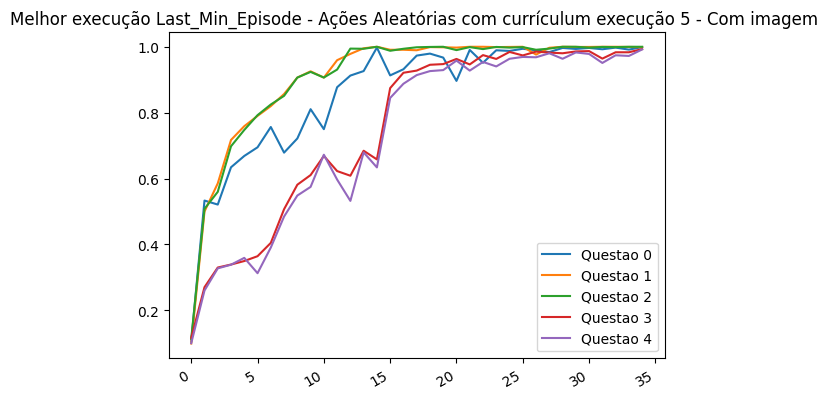

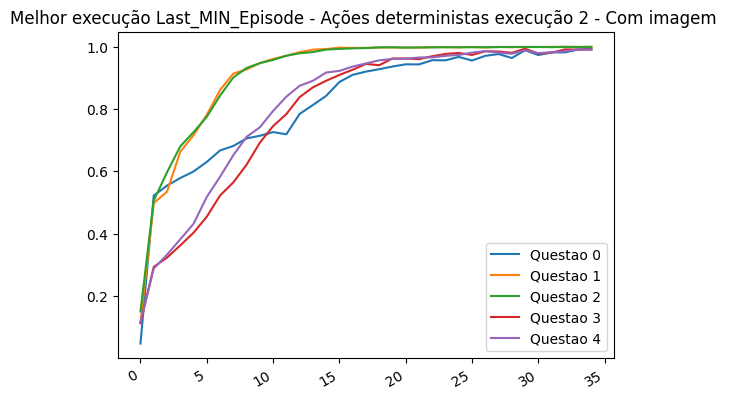

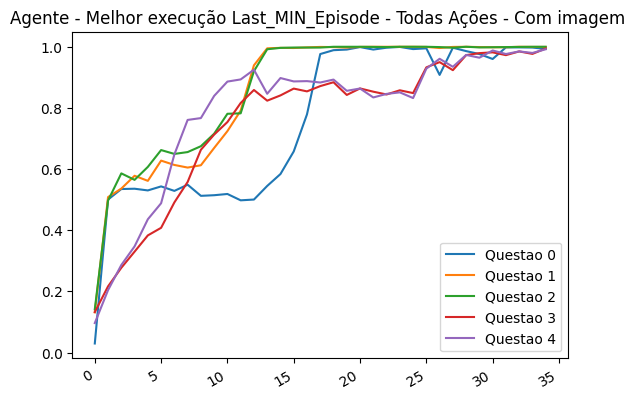

In [12]:

epsodios=[]
epsodios.append(ale5Imagem)
titulo = 'Melhor execução Last_Min_Episode - Ações Aleatórias com currículum execução 5 - Com imagem '
dataRel = generateDataToRels(epsodios,5)
gerarRelatorio(dataRel,titulo)


epsodios=[]
epsodios.append(ac2img)
titulo = 'Melhor execução Last_MIN_Episode - Ações deterministas execução 2 - Com imagem '
dataRel = generateDataToRels(epsodios,5)
gerarRelatorio(dataRel,titulo)




titulo = 'Agente - Melhor execução Last_MIN_Episode - Todas Ações - Com imagem '
AgenteavgASTComimagemTudo = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AgenteMINLASTcomimagemTudo.csv')
epsodios=[]
epsodios.append(AgenteavgASTComimagemTudo)
dataRel = generateDataToRels(epsodios,5)
gerarRelatorio(dataRel,titulo)

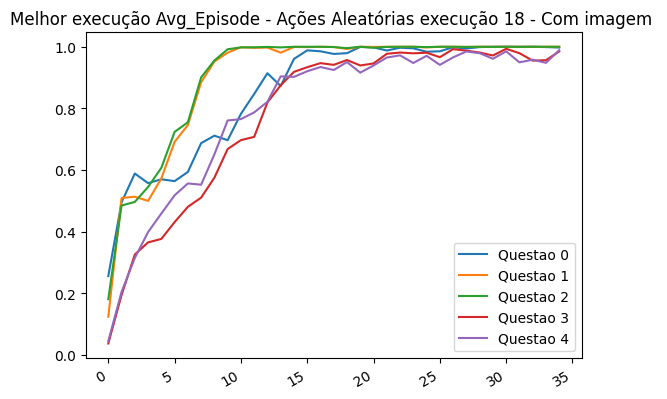

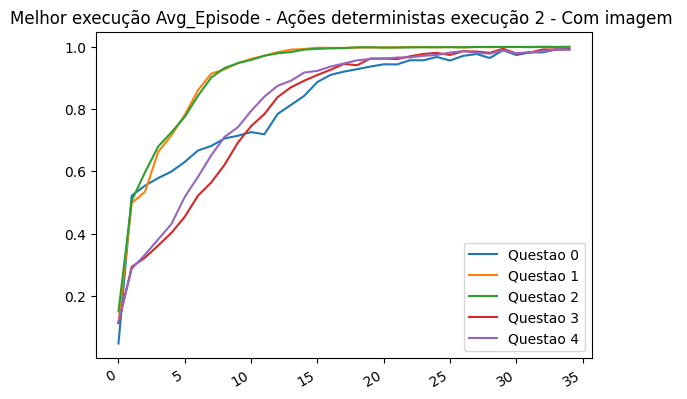

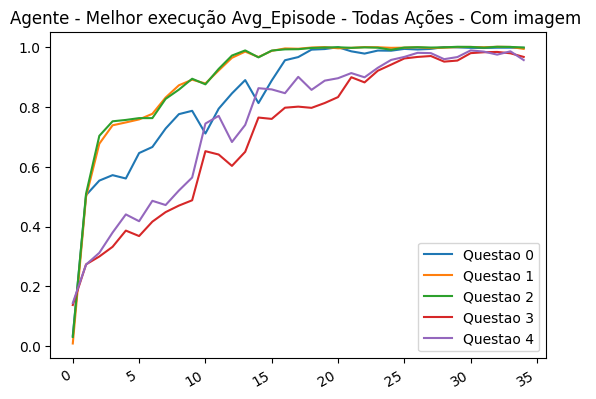

In [13]:

epsodios=[]
epsodios.append(ale18Imagem)
titulo = 'Melhor execução Avg_Episode - Ações Aleatórias execução 18 - Com imagem '
dataRel = generateDataToRels(epsodios,5)
gerarRelatorio(dataRel,titulo)


epsodios=[]
epsodios.append(ac2img)
titulo = 'Melhor execução Avg_Episode - Ações deterministas execução 2 - Com imagem '
dataRel = generateDataToRels(epsodios,5)
gerarRelatorio(dataRel,titulo)




titulo = 'Agente - Melhor execução Avg_Episode - Todas Ações - Com imagem '
AgenteavgASTComimagemTudo = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AgenteAVGcomimagemTudo.csv')
epsodios=[]
epsodios.append(AgenteavgASTComimagemTudo)
dataRel = generateDataToRels(epsodios,5)
gerarRelatorio(dataRel,titulo)

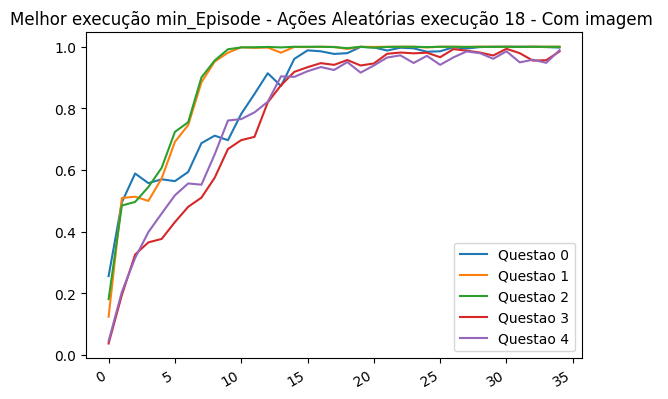

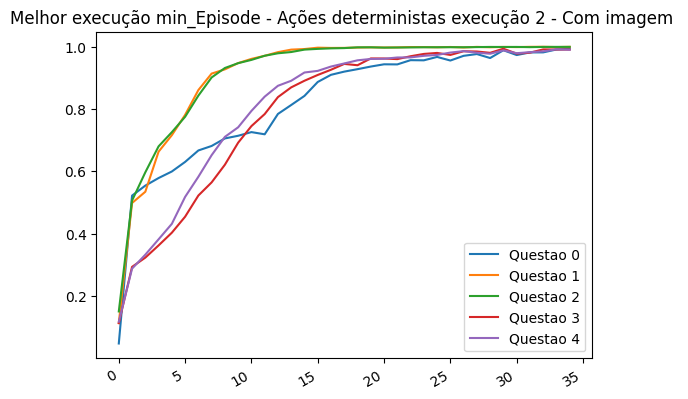

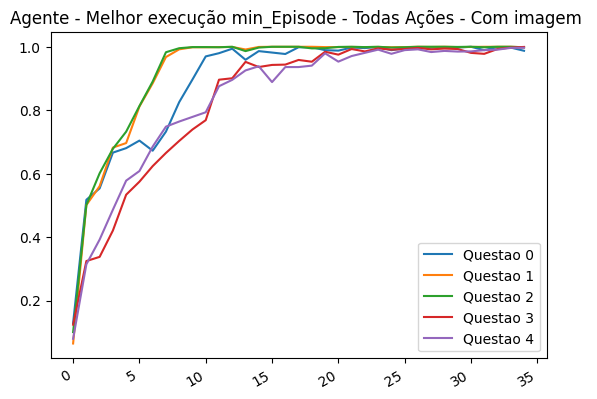

In [14]:
epsodios=[]
epsodios.append(ale18Imagem)
titulo = 'Melhor execução min_Episode - Ações Aleatórias execução 18 - Com imagem '
dataRel = generateDataToRels(epsodios,5)
gerarRelatorio(dataRel,titulo)


epsodios=[]
epsodios.append(ac2img)
titulo = 'Melhor execução min_Episode - Ações deterministas execução 2 - Com imagem '
dataRel = generateDataToRels(epsodios,5)
gerarRelatorio(dataRel,titulo)




titulo = 'Agente - Melhor execução min_Episode - Todas Ações - Com imagem '
AgenteavgASTComimagemTudo = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AgenteMincomimagemTudo.csv')
epsodios=[]
epsodios.append(AgenteavgASTComimagemTudo)
dataRel = generateDataToRels(epsodios,5)
gerarRelatorio(dataRel,titulo)

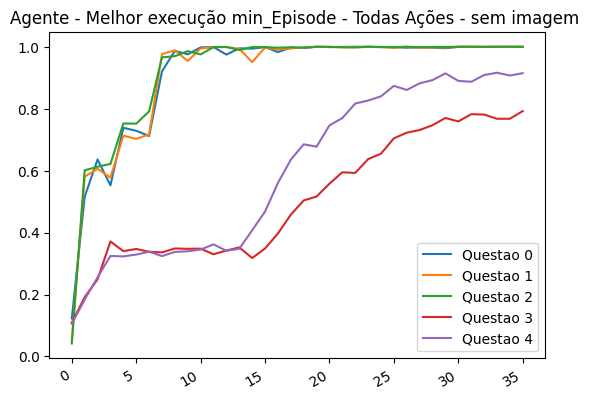

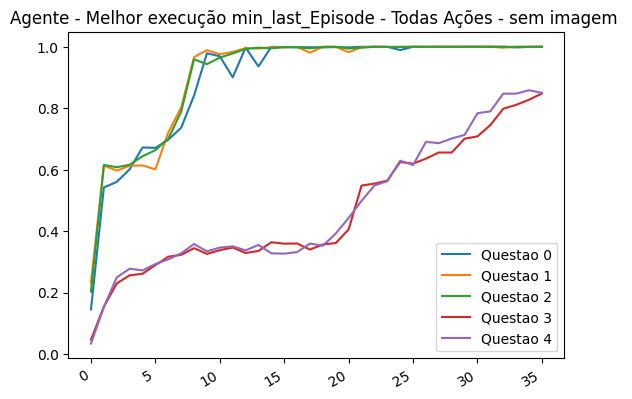

In [36]:
titulo = 'Agente - Melhor execução min_Episode - Todas Ações - sem imagem '
AgenteavgASTComimagemTudo1 = LoadEp('D:\\source\\PesquisaMestradoFinal\\dataSetResume\\AgenteMinSemImagemTudo.csv')
                                    
epsodios=[]
epsodios.append(AgenteavgASTComimagemTudo1)
dataRel = generateDataToRels(epsodios,5)
gerarRelatorio(dataRel,titulo)

titulo = 'Agente - Melhor execução min_last_Episode - Todas Ações - sem imagem '
AgenteavgASTComimagemTudo = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AgenteMinLastSemImagemTudo.csv')
epsodios=[]
epsodios.append(AgenteavgASTComimagemTudo)
dataRel = generateDataToRels(epsodios,5)
gerarRelatorio(dataRel,titulo)



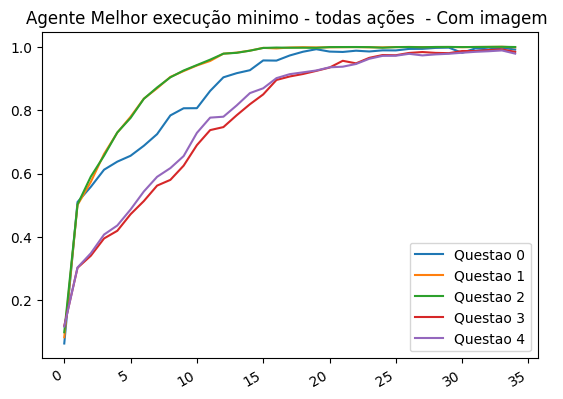

In [16]:
AgenteMiminimoComimagemTudo = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\AgenteMiminimoComimagemTudo.csv')

epsodios=[]
epsodios.append(AgenteMiminimoComimagemTudo)

titulo = 'Agente Melhor execução minimo - todas ações  - Com imagem '

dataRel = generateDataToRels(epsodios,5)

gerarRelatorio(dataRel,titulo)

In [17]:
epsodios.append(ale3Imagem)

dataRel = generateDataToRels(epsodios,5)

print('****************' + str(len(epsodios)))
gerarRelatorio(dataRel)

IndexError: index 36 is out of bounds for axis 2 with size 36

In [ ]:
def GenerateDataToGraficAnalise(epsodios): 
    cont = -1 
    epsodiosEvaluation = []
    #print(len(epsodios))
    for e in range(len(epsodios)):
        ep=[] 
        for i in range(len(epsodios[e])) :
            ep.append(ast.literal_eval(epsodios[e]["concat"][i]  ))
        epsodiosEvaluation.append(ep)
    return epsodiosEvaluation

1
1


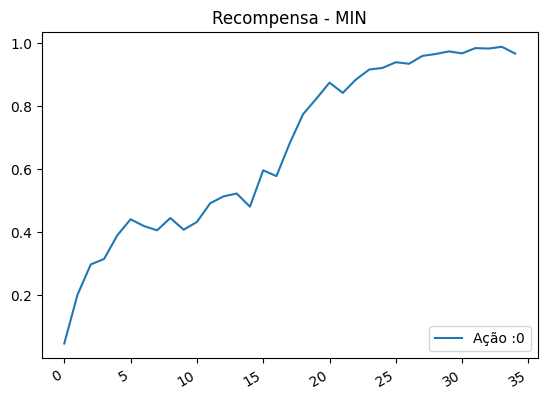

Minimo -[23.346909999999998]
1


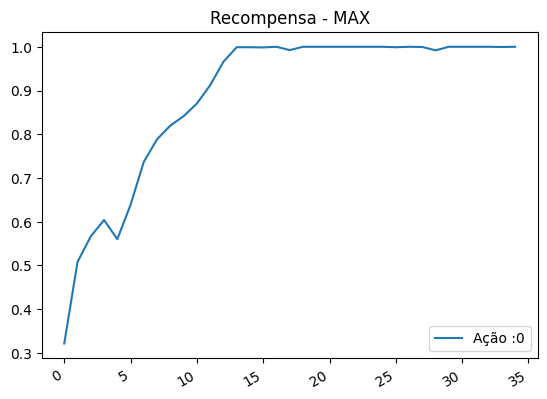

Maximo -[31.11286]
1


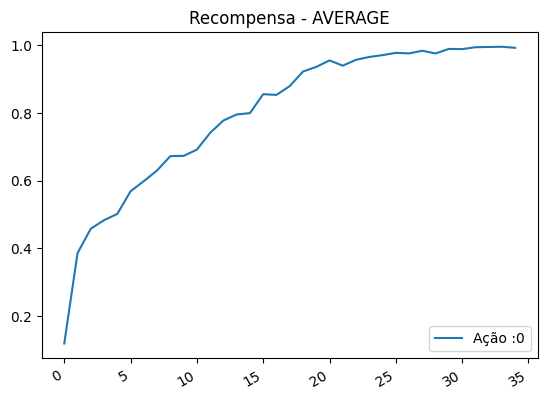

Avarage -[27.965639999999997]
1


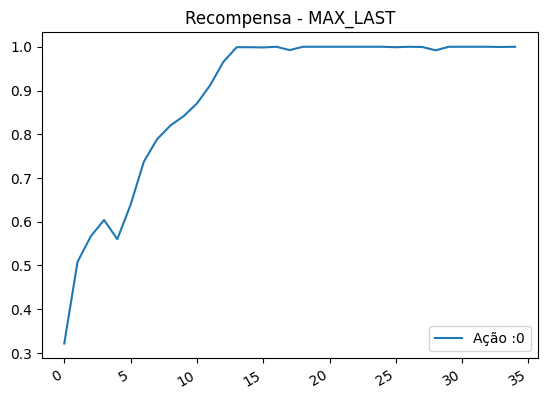

Maximo LAST -[1.0]
1


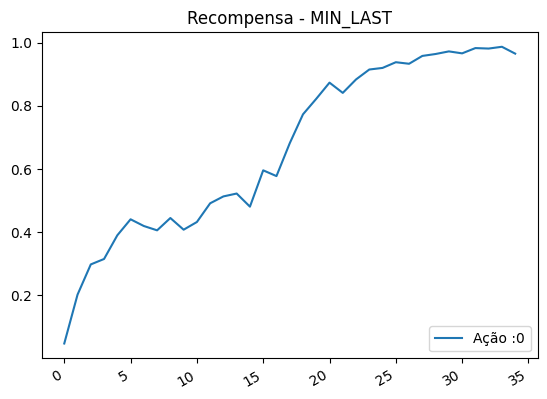

Minimo LAST -[0.96524]
1


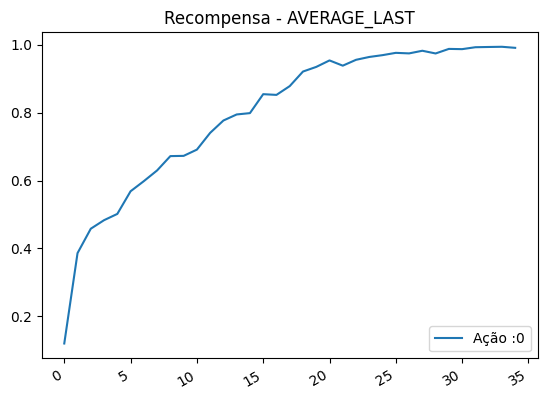

Avarage LAST -[0.990922]


In [ ]:

epsodiosEvaluation = GenerateDataToGraficAnalise(epsodios)
print(len(epsodios))

#np.min(dataRel,axis=1)
min_data = plotDataAnalise (epsodiosEvaluation, 'MIN',35)
print("Minimo -{}".format(min_data))

max_data = plotDataAnalise (epsodiosEvaluation, 'MAX',35)
print("Maximo -{}".format(max_data))

avarage_last_data = plotDataAnalise (epsodiosEvaluation, 'AVERAGE',35)
print("Avarage -{}".format(avarage_last_data))


max_last_data = plotDataAnalise (epsodiosEvaluation, 'MAX_LAST',35)
print("Maximo LAST -{}".format(max_last_data))

min_last_data = plotDataAnalise (epsodiosEvaluation, 'MIN_LAST',35)
print("Minimo LAST -{}".format(min_last_data))



avarage_data = plotDataAnalise (epsodiosEvaluation, 'AVERAGE_LAST',35)
print("Avarage LAST -{}".format(avarage_data))

#dataRel[0]
#epsodiosEvaluation[4][67]


In [ ]:

MelhorMin = LoadEp('d:\\source\\PesquisaMestradoFinal\\dataSetResume\\MelhorMin.csv')
MelhorMin.head()

,0,/content/drive/MyDrive/Colab Notebooks/CodigoPesquisa/Execution/TesteDQN_ExecuaoDoMelhorMin,0.16,0.08616161616161616,0.10393541876892028,0.04334677419354839,0.04244567963617989,0.11764705882352941,0.12355017650025214,"0.1,0.1,0.1,1,1",DQN,0.1,0.2,0.3
0,1500,/content/drive/MyDrive/Colab Notebooks/CodigoP...,0.27,0.386667,0.424319,0.542843,0.533603,0.213489,0.218356,"0.1,0.1,0.1,1,1",DQN,0,0,0
1,3000,/content/drive/MyDrive/Colab Notebooks/CodigoP...,0.37,0.446465,0.497982,0.558468,0.537140,0.324544,0.313666,"0.1,0.1,0.1,1,1",DQN,0,0,0
2,4500,/content/drive/MyDrive/Colab Notebooks/CodigoP...,0.36,0.468586,0.506559,0.576109,0.598787,0.320487,0.340393,"0.1,0.1,0.1,1,1",DQN,0,0,0
3,6000,/content/drive/MyDrive/Colab Notebooks/CodigoP...,0.38,0.464444,0.501009,0.597782,0.589692,0.307809,0.325265,"0.1,0.1,0.1,1,1",DQN,0,0,0
4,7500,/content/drive/MyDrive/Colab Notebooks/CodigoP...,0.40,0.469697,0.479818,0.607863,0.595250,0.352941,0.312153,"0.1,0.1,0.1,1,1",DQN,0,0,0


In [ ]:
df2 = MelhorMin.drop(MelhorMin.columns[[ 1, 2,3,9,10,11,12,13]],axis = 1)
df2.head() 
 
      


,0,0.10393541876892028,0.04334677419354839,0.04244567963617989,0.11764705882352941,0.12355017650025214
0,1500,0.424319,0.542843,0.533603,0.213489,0.218356
1,3000,0.497982,0.558468,0.537140,0.324544,0.313666
2,4500,0.506559,0.576109,0.598787,0.320487,0.340393
3,6000,0.501009,0.597782,0.589692,0.307809,0.325265
4,7500,0.479818,0.607863,0.595250,0.352941,0.312153


Text(0.5, 1.0, 'ação - Melhor minímo')

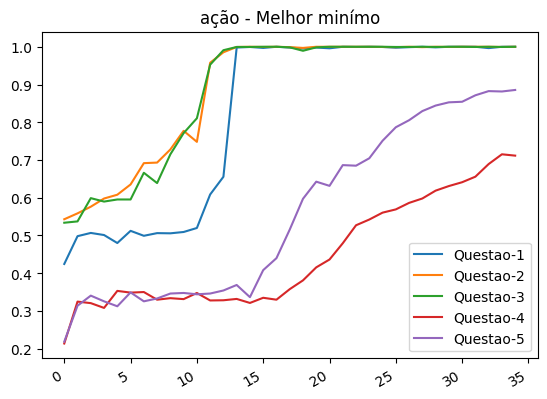

In [ ]:
df2.iloc[:,0]

i = 1
figure, ax1 = plt.subplots()
while i <= 5 :
    ax1.plot(df2.iloc[:,i], label = "Questao-"+str(i))
    i+=1
#figure.autofmt_xdate() 

#for acao in range ( 5 ) : 
#ax.plot(df2[:1])
     
#    ax.set_title('ação - {}'.format(acoes[i]) )
plt.legend(loc="lower right")
figure.autofmt_xdate() 
ax1.set_title('ação - {}'.format("Melhor minímo") )